In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"surabhigovil","key":"4b4a01fbc79aa74ee86dab961f0653f5"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 /root/.kaggle/kaggle.json

In [34]:
! kaggle datasets download -d 'tanlikesmath/diabetic-retinopathy-resized'

diabetic-retinopathy-resized.zip: Skipping, found more recently modified local copy (use --force to force download)


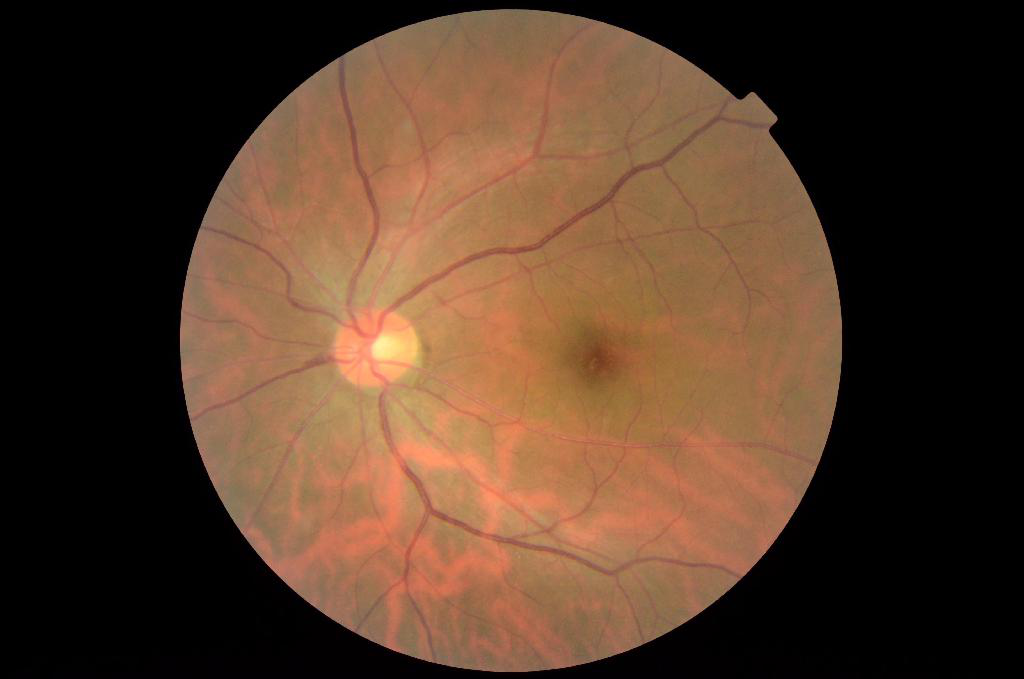

In [49]:
import os
os.listdir('/content/train_images/resized_train/resized_train/16547_right.jpeg')


In [36]:
import zipfile
from google.colab import files


import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [37]:
! mkdir train_images

mkdir: cannot create directory ‘train_images’: File exists


In [38]:
! unzip diabetic-retinopathy-resized.zip -d train_images

Archive:  diabetic-retinopathy-resized.zip
replace train_images/resized_train/resized_train/10003_left.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [39]:
import pandas as pd

train = pd.read_csv('/content/train_images/trainLabels.csv')

train.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


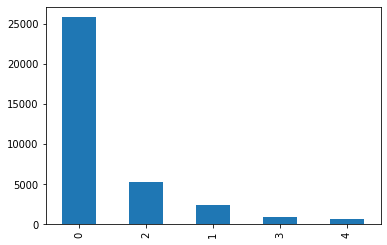

In [40]:
train["level"].value_counts().plot(kind="bar")

In [103]:
# import the necessary packages
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as si
from skimage.io import imread, imshow
from skimage.color import rgb2gray

In [105]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((skimage.img_as_float(imageA) - skimage.img_as_float(imageB)) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err
def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()


In [106]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
right = si.imread("/content/train_images/resized_train/resized_train/16547_right.jpeg")
left = si.imread("/content/train_images/resized_train/resized_train/16547_left.jpeg")

# convert the images to grayscale
right_grayscale = rgb2gray(right)
left_grayscale = rgb2gray(left)


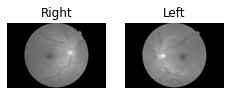

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


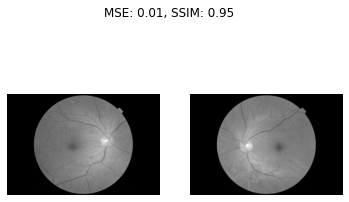

In [107]:
# initialize the figure
fig = plt.figure("Images")
images = ("Right", right_grayscale), ("Left", left_grayscale)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(right_grayscale, left_grayscale, "Right vs. Left")